# 10 Minutes to pandas
### Gamal Akbar - 5215100146

In [2]:
import numpy as np
import pandas as pd

## Object Creation

In [3]:
#Create Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
#Create Dataframe
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.519046,0.767585,1.351118,0.150153
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516
2013-01-05,-0.237587,-2.668518,0.984437,0.630698
2013-01-06,-0.460535,2.363015,-1.852908,0.782853


In [6]:
#Create dataframe from dict of object
df2 = pd.DataFrame({'A': 1.,
   'B': pd.Timestamp('20130102'),
   'C': pd.Series(1, index=list(range(4)), dtype='float32'),
   'D': np.array([3] * 4, dtype='int32'),
   'E': pd.Categorical(["test", "train", "test", "train"]),
   'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [8]:
#display top
df.head() 

,A,B,C,D
2013-01-01,-0.519046,0.767585,1.351118,0.150153
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516
2013-01-05,-0.237587,-2.668518,0.984437,0.630698


In [9]:
#display bottom
df.tail()

,A,B,C,D
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516
2013-01-05,-0.237587,-2.668518,0.984437,0.630698
2013-01-06,-0.460535,2.363015,-1.852908,0.782853


In [10]:
#display index
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
#display column
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
#convert to numpy array
df.to_numpy()

array([[-0.51904593,  0.76758502,  1.35111844,  0.15015277],
       [-0.15657871,  0.15898153, -1.64293336,  1.25654865],
       [ 2.31640974,  1.99573519, -0.38628122,  0.4230169 ],
       [-0.53290914, -0.05003243,  0.09396594, -0.39951623],
       [-0.23758738, -2.66851838,  0.98443741,  0.63069765],
       [-0.46053546,  2.36301471, -1.85290806,  0.78285304]])

In [13]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [14]:
#Show summary
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.068292,0.427794,-0.242100,0.473959
std,1.112136,1.800372,1.321628,0.566186
min,-0.532909,-2.668518,-1.852908,-0.399516
25%,-0.504418,0.002221,-1.328770,0.218369
50%,-0.349061,0.463283,-0.146158,0.526857
75%,-0.176831,1.688698,0.761820,0.744814
max,2.316410,2.363015,1.351118,1.256549


In [15]:
#transpose data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.519046,-0.156579,2.316410,-0.532909,-0.237587,-0.460535
B,0.767585,0.158982,1.995735,-0.050032,-2.668518,2.363015
C,1.351118,-1.642933,-0.386281,0.093966,0.984437,-1.852908
D,0.150153,1.256549,0.423017,-0.399516,0.630698,0.782853


In [16]:
#sort by axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.150153,1.351118,0.767585,-0.519046
2013-01-02,1.256549,-1.642933,0.158982,-0.156579
2013-01-03,0.423017,-0.386281,1.995735,2.316410
2013-01-04,-0.399516,0.093966,-0.050032,-0.532909
2013-01-05,0.630698,0.984437,-2.668518,-0.237587
2013-01-06,0.782853,-1.852908,2.363015,-0.460535


In [17]:
#sort by value
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.237587,-2.668518,0.984437,0.630698
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-01,-0.519046,0.767585,1.351118,0.150153
2013-01-03,2.316410,1.995735,-0.386281,0.423017
2013-01-06,-0.460535,2.363015,-1.852908,0.782853


## Selection

In [18]:
df['A']

2013-01-01   -0.519046
2013-01-02   -0.156579
2013-01-03    2.316410
2013-01-04   -0.532909
2013-01-05   -0.237587
2013-01-06   -0.460535
Freq: D, Name: A, dtype: float64

In [19]:
#slice row
df[0:3]

,A,B,C,D
2013-01-01,-0.519046,0.767585,1.351118,0.150153
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017


In [20]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516


## Selection By Label

In [22]:
#For getting a cross section using a label:
df.loc[dates[0]]

A   -0.519046
B    0.767585
C    1.351118
D    0.150153
Name: 2013-01-01 00:00:00, dtype: float64

In [23]:
#Selecting on a multi-axis by label:
df.loc[:, ['A', 'B']]

,A,B
2013-01-01,-0.519046,0.767585
2013-01-02,-0.156579,0.158982
2013-01-03,2.316410,1.995735
2013-01-04,-0.532909,-0.050032
2013-01-05,-0.237587,-2.668518
2013-01-06,-0.460535,2.363015


In [24]:
# Showing label slicing, both endpoints are included:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,-0.156579,0.158982
2013-01-03,2.316410,1.995735
2013-01-04,-0.532909,-0.050032


In [25]:
#Reduction in the dimensions of the returned object
df.loc['20130102', ['A', 'B']]

A   -0.156579
B    0.158982
Name: 2013-01-02 00:00:00, dtype: float64

In [26]:
#For getting a scalar value:
df.loc[dates[0], 'A']

-0.5190459269904383

In [27]:
#For getting fast access to a scalar (equivalent to the prior method):
df.at[dates[0], 'A']

-0.5190459269904383

## Selection by Position

In [28]:
#Select via the position of the passed integers:
df.iloc[3]


A   -0.532909
B   -0.050032
C    0.093966
D   -0.399516
Name: 2013-01-04 00:00:00, dtype: float64

In [29]:
#By integer slices, acting similar to numpy/python
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.532909,-0.050032
2013-01-05,-0.237587,-2.668518


In [30]:
#By lists of integer position locations, similar to the numpy/python style:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.156579,-1.642933
2013-01-03,2.316410,-0.386281
2013-01-05,-0.237587,0.984437


In [31]:
#For slicing rows explicitly:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.156579,0.158982,-1.642933,1.256549
2013-01-03,2.316410,1.995735,-0.386281,0.423017


In [32]:
#For slicing columns explicitly:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.767585,1.351118
2013-01-02,0.158982,-1.642933
2013-01-03,1.995735,-0.386281
2013-01-04,-0.050032,0.093966
2013-01-05,-2.668518,0.984437
2013-01-06,2.363015,-1.852908


In [33]:
#For getting a value explicitly:
df.iloc[1, 1]

0.158981530724254

In [34]:
#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1, 1]

0.158981530724254

## Boolean Indexing

In [35]:
#Using a single column’s values to select data.
df[df.A > 0]

,A,B,C,D
2013-01-03,2.31641,1.995735,-0.386281,0.423017


In [36]:
#Selecting values from a DataFrame where a boolean condition is met.
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.767585,1.351118,0.150153
2013-01-02,NaN,0.158982,NaN,1.256549
2013-01-03,2.31641,1.995735,NaN,0.423017
2013-01-04,NaN,NaN,0.093966,NaN
2013-01-05,NaN,NaN,0.984437,0.630698
2013-01-06,NaN,2.363015,NaN,0.782853


In [39]:
#Using the isin() method for filtering:
df3 = df.copy()
df3['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df3

,A,B,C,D,E
2013-01-01,-0.519046,0.767585,1.351118,0.150153,one
2013-01-02,-0.156579,0.158982,-1.642933,1.256549,one
2013-01-03,2.316410,1.995735,-0.386281,0.423017,two
2013-01-04,-0.532909,-0.050032,0.093966,-0.399516,three
2013-01-05,-0.237587,-2.668518,0.984437,0.630698,four
2013-01-06,-0.460535,2.363015,-1.852908,0.782853,three


In [41]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E,F


## Setting

In [43]:
#Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [44]:
df['F'] = s1

In [45]:
#Setting values by label:
df.at[dates[0], 'A'] = 0

In [46]:
#Setting values by position:
df.iat[0, 1] = 0

In [47]:
#Setting by assigning with a NumPy array:
df.loc[:, 'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.351118,5,NaN
2013-01-02,-0.156579,0.158982,-1.642933,5,1.0
2013-01-03,2.316410,1.995735,-0.386281,5,2.0
2013-01-04,-0.532909,-0.050032,0.093966,5,3.0
2013-01-05,-0.237587,-2.668518,0.984437,5,4.0
2013-01-06,-0.460535,2.363015,-1.852908,5,5.0


In [50]:
#A where operation with setting.
df4 = df.copy()
df4[df4 > 0] = -df4
df4

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.351118,-5,NaN
2013-01-02,-0.156579,-0.158982,-1.642933,-5,-1.0
2013-01-03,-2.316410,-1.995735,-0.386281,-5,-2.0
2013-01-04,-0.532909,-0.050032,-0.093966,-5,-3.0
2013-01-05,-0.237587,-2.668518,-0.984437,-5,-4.0
2013-01-06,-0.460535,-2.363015,-1.852908,-5,-5.0


## Missing Data

In [51]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1], 'E'] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.351118,5,NaN,1.0
2013-01-02,-0.156579,0.158982,-1.642933,5,1.0,1.0
2013-01-03,2.316410,1.995735,-0.386281,5,2.0,NaN
2013-01-04,-0.532909,-0.050032,0.093966,5,3.0,NaN


In [52]:
# drop missing data
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.156579,0.158982,-1.642933,5,1.0,1.0


In [53]:
#Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.351118,5,5.0,1.0
2013-01-02,-0.156579,0.158982,-1.642933,5,1.0,1.0
2013-01-03,2.316410,1.995735,-0.386281,5,2.0,5.0
2013-01-04,-0.532909,-0.050032,0.093966,5,3.0,5.0


In [54]:
#To get the boolean mask where values are nan.
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operation

In [55]:
#stat
df.mean()

A    0.154800
B    0.299863
C   -0.242100
D    5.000000
F    3.000000
dtype: float64

In [56]:
#Same operation on the other axis:
df.mean(1)

2013-01-01    1.587780
2013-01-02    0.871894
2013-01-03    2.185173
2013-01-04    1.502205
2013-01-05    1.415666
2013-01-06    2.009914
Freq: D, dtype: float64

In [57]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [58]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.316410,0.995735,-1.386281,4.0,1.0
2013-01-04,-3.532909,-3.050032,-2.906034,2.0,0.0
2013-01-05,-5.237587,-7.668518,-4.015563,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply

In [59]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.351118,5,NaN
2013-01-02,-0.156579,0.158982,-0.291815,10,1.0
2013-01-03,2.159831,2.154717,-0.678096,15,3.0
2013-01-04,1.626922,2.104684,-0.584130,20,6.0
2013-01-05,1.389335,-0.563834,0.400307,25,10.0
2013-01-06,0.928799,1.799181,-1.452601,30,15.0


In [60]:
df.apply(lambda x: x.max() - x.min())

A    2.849319
B    5.031533
C    3.204026
D    0.000000
F    4.000000
dtype: float64

## Histogramming 

In [61]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    4
1    4
2    5
3    0
4    0
5    1
6    3
7    6
8    6
9    3
dtype: int32

In [62]:
s.value_counts

<bound method IndexOpsMixin.value_counts of 0    4
1    4
2    5
3    0
4    0
5    1
6    3
7    6
8    6
9    3
dtype: int32>

## String Methods

In [63]:
 s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
 s   

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

## Merge

In [64]:
#concat
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.468640,0.439836,-0.712141,1.247640
1,-0.161339,-0.035829,-2.738235,-0.679354
2,-1.102016,-0.507530,0.372828,-0.756092
3,-0.255458,-0.152215,0.760432,0.067163
4,-0.948847,0.288993,-0.300990,-0.035199
5,1.266069,0.547477,-0.993719,-0.023543
6,1.215309,-0.707655,0.584653,-1.788600
7,-0.219448,-1.371673,-0.844387,0.372736
8,-0.072653,0.914943,0.587998,1.680087
9,-0.304812,0.473526,1.176233,-0.263128


In [65]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.468640,0.439836,-0.712141,1.247640
1,-0.161339,-0.035829,-2.738235,-0.679354
2,-1.102016,-0.507530,0.372828,-0.756092
3,-0.255458,-0.152215,0.760432,0.067163
4,-0.948847,0.288993,-0.300990,-0.035199
5,1.266069,0.547477,-0.993719,-0.023543
6,1.215309,-0.707655,0.584653,-1.788600
7,-0.219448,-1.371673,-0.844387,0.372736
8,-0.072653,0.914943,0.587998,1.680087
9,-0.304812,0.473526,1.176233,-0.263128


### Join

In [67]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})

right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [68]:
right

,key,rval
0,foo,4
1,foo,5


In [69]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [70]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

df

,A,B,C,D
0,1.498079,0.240522,1.120687,-0.407960
1,0.419494,-0.711015,-0.872926,0.716558
2,0.528607,0.277027,-0.898218,-1.255580
3,1.000509,-0.654738,0.395514,-0.708602
4,-0.628908,-0.076855,0.589377,-0.725547
5,1.092352,0.065712,-1.635704,-0.257053
6,1.561997,-0.763659,-0.743648,-1.083127
7,2.451602,0.598490,0.217259,-1.070184


In [72]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,1.498079,0.240522,1.120687,-0.407960
1,0.419494,-0.711015,-0.872926,0.716558
2,0.528607,0.277027,-0.898218,-1.255580
3,1.000509,-0.654738,0.395514,-0.708602
4,-0.628908,-0.076855,0.589377,-0.725547
5,1.092352,0.065712,-1.635704,-0.257053
6,1.561997,-0.763659,-0.743648,-1.083127
7,2.451602,0.598490,0.217259,-1.070184
8,1.000509,-0.654738,0.395514,-0.708602


### Grouping 

In [73]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
   ....:                          'foo', 'bar', 'foo', 'foo'],
   ....:                    'B': ['one', 'one', 'two', 'three',
   ....:                          'two', 'two', 'one', 'three'],
   ....:                    'C': np.random.randn(8),
   ....:                    'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.036901,-0.083911
1,bar,one,1.234277,0.404383
2,foo,two,1.874708,0.948751
3,bar,three,-1.296087,0.303757
4,foo,two,-0.368111,-0.043569
5,bar,two,-0.749465,-0.655566
6,foo,one,-0.829554,-0.736514
7,foo,three,0.450548,0.963854


In [74]:
#Grouping and then applying the sum() function to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,-0.811276,0.052574
foo,2.164492,1.048612


In [75]:
#Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    1.234277  0.404383
    three -1.296087  0.303757
    two   -0.749465 -0.655566
foo one    0.207347 -0.820425
    three  0.450548  0.963854
    two    1.506597  0.905182

## Reshaping 

### stack 

In [77]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
   ....:                      'foo', 'foo', 'qux', 'qux'],
   ....:                     ['one', 'two', 'one', 'two',
   ....:                      'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.166717  0.352396
      two     0.140314 -0.811483
baz   one     2.618536 -0.757635
      two    -1.357523  1.299940

In [78]:
#The stack() method “compresses” a level in the DataFrame’s columns
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.166717
               B    0.352396
       two     A    0.140314
               B   -0.811483
baz    one     A    2.618536
               B   -0.757635
       two     A   -1.357523
               B    1.299940
dtype: float64

In [79]:
#unstacked
stacked.unstack()

A         B
first second                    
bar   one    -0.166717  0.352396
      two     0.140314 -0.811483
baz   one     2.618536 -0.757635
      two    -1.357523  1.299940

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.166717  0.140314
      B  0.352396 -0.811483
baz   A  2.618536 -1.357523
      B -0.757635  1.299940

In [81]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.166717  2.618536
       B  0.352396 -0.757635
two    A  0.140314 -1.357523
       B -0.811483  1.299940

### Pivot tables

In [82]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
   .....:                    'B': ['A', 'B', 'C'] * 4,
   .....:                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
   .....:                    'D': np.random.randn(12),
   .....:                    'E': np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.114503,-0.359846
1,one,B,foo,-0.273360,-0.037370
2,two,C,foo,0.081099,-0.243535
3,three,A,bar,0.336789,-0.996389
4,one,B,bar,1.172042,-0.244107
5,one,C,bar,-0.065030,1.391735
6,two,A,foo,0.187495,0.633704
7,three,B,foo,1.095003,-0.387883
8,one,C,foo,-0.360841,-0.171268
9,one,A,bar,1.157047,-0.380351


In [83]:
#pivot
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.157047 -0.114503
      B  1.172042 -0.273360
      C -0.065030 -0.360841
three A  0.336789       NaN
      B       NaN  1.095003
      C -0.499926       NaN
two   A       NaN  0.187495
      B -0.227864       NaN
      C       NaN  0.081099

## Time Series 

In [84]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min').sum()

2012-01-01    22354
Freq: 5T, dtype: int32

In [85]:
# Time zone representation:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.260349
2012-03-07    0.251740
2012-03-08   -0.979386
2012-03-09   -0.600374
2012-03-10    1.777941
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.260349
2012-03-07 00:00:00+00:00    0.251740
2012-03-08 00:00:00+00:00   -0.979386
2012-03-09 00:00:00+00:00   -0.600374
2012-03-10 00:00:00+00:00    1.777941
Freq: D, dtype: float64

In [87]:
# Converting to another time zone:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.260349
2012-03-06 19:00:00-05:00    0.251740
2012-03-07 19:00:00-05:00   -0.979386
2012-03-08 19:00:00-05:00   -0.600374
2012-03-09 19:00:00-05:00    1.777941
Freq: D, dtype: float64

In [88]:
# Converting between time span representations:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.750954
2012-02-29    0.387763
2012-03-31   -1.677659
2012-04-30   -0.664079
2012-05-31   -0.968863
Freq: M, dtype: float64

In [89]:
ps = ts.to_period()
ps

2012-01   -0.750954
2012-02    0.387763
2012-03   -1.677659
2012-04   -0.664079
2012-05   -0.968863
Freq: M, dtype: float64

In [90]:
ps.to_timestamp()

2012-01-01   -0.750954
2012-02-01    0.387763
2012-03-01   -1.677659
2012-04-01   -0.664079
2012-05-01   -0.968863
Freq: MS, dtype: float64

In [91]:
#we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -0.967447
1990-06-01 09:00    0.011871
1990-09-01 09:00    0.404082
1990-12-01 09:00    1.614748
1991-03-01 09:00    0.087293
Freq: H, dtype: float64

## Categoricals


In [93]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
   .....:                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
   .....: 

In [94]:
# mConvert the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [95]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [96]:
 df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
   .....:                                               "good", "very good"])

In [97]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [98]:
#Sorting is per order in the categories, not lexical order.
 df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [99]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

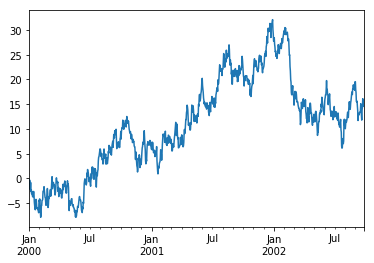

In [101]:
ts = pd.Series(np.random.randn(1000),
   .....:                index=pd.date_range('1/1/2000', periods=1000))
   .....: 
ts = ts.cumsum()
ts.plot()

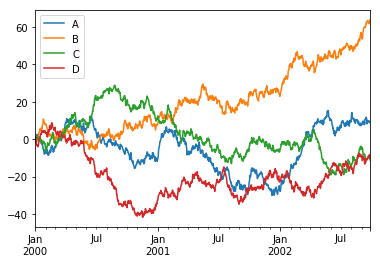

In [106]:
# On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:
import matplotlib as plt
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()



## Getting Data In/Out 

In [107]:
df.to_csv('foo.csv')

In [108]:
#read csv
 pd.read_csv('foo.csv')


,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.378876,0.121674,0.039382,-0.452429
1,2000-01-02,0.969962,-0.518664,0.105794,0.253544
2,2000-01-03,0.281172,0.608900,-1.340404,1.035497
3,2000-01-04,0.541834,0.770423,-0.010252,-0.952694
4,2000-01-05,1.807463,0.410758,-0.162969,-2.610219
5,2000-01-06,2.551975,0.221248,0.365388,-3.282319
6,2000-01-07,2.465462,-0.968551,1.882686,-3.041817
7,2000-01-08,1.757327,0.357974,0.427210,-3.873532
8,2000-01-09,0.626712,1.487365,0.782299,-4.121655
9,2000-01-10,-0.561972,1.777557,0.692885,-3.451839


## HDF5

In [115]:
#Reading and writing to HDFStores.

#Writing to a HDF5 Store.
df.to_hdf('foo.h5', 'df')

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [113]:
pd.read_hdf('foo.h5', 'df')

FileNotFoundError: File foo.h5 does not exist

## Excel 

In [116]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [117]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.378876,0.121674,0.039382,-0.452429
1,2000-01-02,0.969962,-0.518664,0.105794,0.253544
2,2000-01-03,0.281172,0.608900,-1.340404,1.035497
3,2000-01-04,0.541834,0.770423,-0.010252,-0.952694
4,2000-01-05,1.807463,0.410758,-0.162969,-2.610219
5,2000-01-06,2.551975,0.221248,0.365388,-3.282319
6,2000-01-07,2.465462,-0.968551,1.882686,-3.041817
7,2000-01-08,1.757327,0.357974,0.427210,-3.873532
8,2000-01-09,0.626712,1.487365,0.782299,-4.121655
9,2000-01-10,-0.561972,1.777557,0.692885,-3.451839


## Gotchas 

In [119]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().